# Perceptron learning algorithm to implement Logic gates with Backpropagation algorithm


In [196]:
import numpy as np
import matplotlib.pyplot as plt

In [197]:
train_set_x = np.array([[0,0,1,1],[0,1,0,1]])
train_set_y = np.array([[0,0,0,1]])
train_set_yAND = np.array([[0,0,0,1]])#AND
train_set_yOR = np.array([[0,1,1,1]])#OR
train_set_yNAND = np.array([[1,1,1,0]])#NAND

In [198]:

def hardlim(z):
    s = (z>=0).astype(float)
    return s

In [199]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
(cost) $J = \frac{1}{2}\sum_{i=1}^{m}(a^{(i)}-y^{(i)})^{(2)}$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \ X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [200]:

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = np.sum((A-Y)**2)/2                                # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)
    db = np.sum((A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [201]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every training iterations
        print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [202]:

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = hardlim(np.dot(w.T,X)+b)
    
    Y_prediction = A    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [203]:

def model(X_train, Y_train, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w, b, X_train)


    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('w: {}'.format(w))
    print('b: {}'.format(b))
    print('Y_prediction_train: {}'.format(Y_prediction_train))
    print('Y_train: {}'.format(Y_train))
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

---------AND Neural Network Model----------
Cost after iteration 0: 0.500000
Cost after iteration 1: 1.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 1.000000
Cost after iteration 4: 0.500000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[0.01]
 [0.01]]
b: -0.019999999999999997
Y_prediction_train: [[0. 0. 0. 1.]]
Y_train: [[0 0 0 1]]


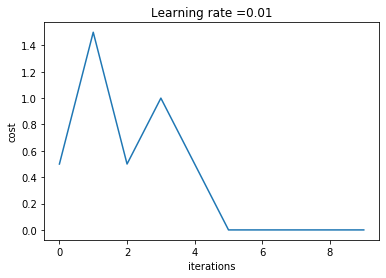

In [204]:
print("---------AND Neural Network Model----------")
dAND = model(train_set_x, train_set_yAND, num_iterations = 10, learning_rate = 0.01, print_cost = True)
# Plot learning curve (with costs)
costs = np.squeeze(dAND['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(dAND["learning_rate"]))
plt.show()

learning rate is: 0.01
Cost after iteration 0: 0.500000
Cost after iteration 1: 1.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 1.000000
Cost after iteration 4: 0.500000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[0.01]
 [0.01]]
b: -0.019999999999999997
Y_prediction_train: [[0. 0. 0. 1.]]
Y_train: [[0 0 0 1]]

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.500000
Cost after iteration 1: 1.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 0.000000
Cost after iteration 4: 0.000000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 50.0 %
w: [[0.001]
 [0.001]]
b: -0.001
Y_prediction_train: [[0. 1. 1. 1.]]
Y_train: [[0 0 0 1

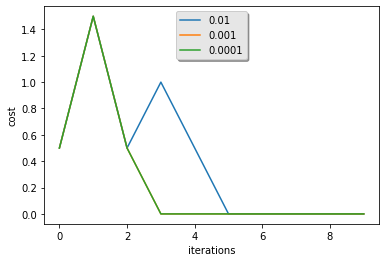

In [205]:
learning_rates = [0.01, 0.001, 0.0001]
modelsAND = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    modelsAND[str(i)] = model(train_set_x, train_set_yAND, num_iterations = 10, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(modelsAND[str(i)]["costs"]), label= str(modelsAND[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

----------OR Neural Network Model-----------
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 0.500000
Cost after iteration 4: 0.000000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[0.02]
 [0.02]]
b: -3.469446951953614e-18
Y_prediction_train: [[0. 1. 1. 1.]]
Y_train: [[0 1 1 1]]


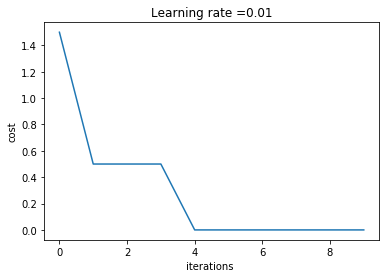

In [206]:
print("----------OR Neural Network Model-----------")
dOR = model(train_set_x, train_set_yOR, num_iterations = 10, learning_rate = 0.01, print_cost = True)
# Plot learning curve (with costs)
costs = np.squeeze(dOR['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(dOR["learning_rate"]))
plt.show()

learning rate is: 0.01
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 0.500000
Cost after iteration 4: 0.000000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[0.02]
 [0.02]]
b: -3.469446951953614e-18
Y_prediction_train: [[0. 1. 1. 1.]]
Y_train: [[0 1 1 1]]

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 0.500000
Cost after iteration 4: 0.000000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 75.0 %
w: [[0.002]
 [0.002]]
b: 0.0
Y_prediction_train: [[1. 1. 1. 1.]]
Y_train: [[0 1 1 1]]

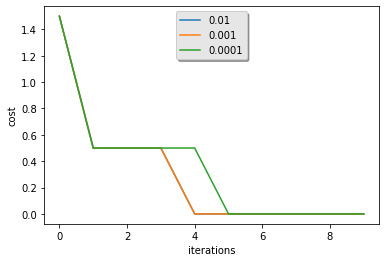

In [207]:
learning_rates = [0.01, 0.001, 0.0001]
modelsOR = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    modelsOR[str(i)] = model(train_set_x, train_set_yOR, num_iterations = 10, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(modelsOR[str(i)]["costs"]), label= str(modelsOR[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

-----------NAND Neural Network Model---------
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 1.000000
Cost after iteration 4: 0.500000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[-0.01]
 [-0.01]]
b: 0.019999999999999997
Y_prediction_train: [[1. 1. 1. 0.]]
Y_train: [[1 1 1 0]]


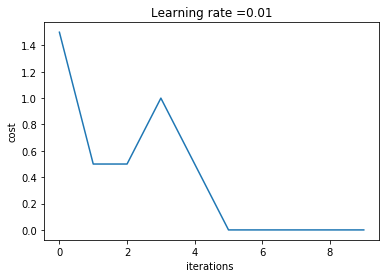

In [208]:
print("-----------NAND Neural Network Model---------")
dNAND = model(train_set_x, train_set_yNAND, num_iterations = 10, learning_rate = 0.01, print_cost = True)
# Plot learning curve (with costs)
costs = np.squeeze(dNAND['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(dNAND["learning_rate"]))
plt.show()

learning rate is: 0.01
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 1.000000
Cost after iteration 4: 0.500000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 100.0 %
w: [[-0.01]
 [-0.01]]
b: 0.019999999999999997
Y_prediction_train: [[1. 1. 1. 0.]]
Y_train: [[1 1 1 0]]

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 1.500000
Cost after iteration 1: 0.500000
Cost after iteration 2: 0.500000
Cost after iteration 3: 1.000000
Cost after iteration 4: 0.500000
Cost after iteration 5: 0.000000
Cost after iteration 6: 0.000000
Cost after iteration 7: 0.000000
Cost after iteration 8: 0.000000
Cost after iteration 9: 0.000000
train accuracy: 75.0 %
w: [[-0.001]
 [-0.001]]
b: 0.002
Y_prediction_train: [[1. 1. 1. 1.]]
Y_train: [[1 1 1

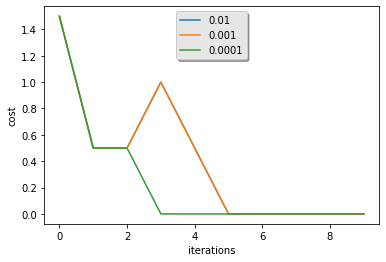

In [209]:
learning_rates = [0.01, 0.001, 0.0001]
modelsNAND = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    modelsNAND[str(i)] = model(train_set_x, train_set_yNAND, num_iterations = 10, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(modelsNAND[str(i)]["costs"]), label= str(modelsNAND[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()